# Importing libraries and reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import isodate
from itertools import combinations
from collections import Counter
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
data = pd.read_excel("songs.xlsx")

In [3]:
data.head()

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,0,F44TK5EHCRo,T-Series,RAFTA RAFTA (Lo-Fi Mix) | Dj Moody | KK | Jeet...,"Presenting the song ""RAFTA RAFTA (Lo-Fi Mix)"" ...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T12:30:08Z,7299,241,0,59,PT4M42S,hd,False
1,1,adx8Rsjp-c0,T-Series,"TUM HO MERA PYAR (Lo-Fi Mix) | Dj Moody | KK, ...","Presenting the song ""TUM HO MERA PYAR (Lo-Fi M...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T10:30:01Z,4212,144,0,32,PT5M27S,hd,False
2,2,36nQLyrR7Sw,T-Series,ISHQ HOTHON SE (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""ISHQ HOTHON SE (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T09:30:00Z,2849,79,0,31,PT6M10S,hd,False
3,3,TKbifi5AMQo,T-Series,HUMKO PYAR HUA (Lo-Fi Mix) (Audio) | Dj Moody ...,"Presenting the song ""HUMKO PYAR HUA (Lo-Fi Mix...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T07:30:05Z,3991,116,0,36,PT5M59S,hd,False
4,4,NNA21SoGqss,T-Series,Har Har Mahadev (Lyrical Video): Sachet Tandon...,"T-Series Presents ""Har Har Mahadev (Lyrical Vi...","['hindi songs 2023', 'hindi songs new', 'bolly...",2023-08-20T05:30:06Z,101950,6230,0,434,PT3M37S,hd,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     19345 non-null  int64 
 1   video_id       19345 non-null  object
 2   channelTitle   19345 non-null  object
 3   title          19345 non-null  object
 4   description    19342 non-null  object
 5   tags           19345 non-null  object
 6   publishedAt    19345 non-null  object
 7   viewCount      19345 non-null  int64 
 8   likeCount      19345 non-null  int64 
 9   favoriteCount  19345 non-null  int64 
 10  commentCount   19345 non-null  int64 
 11  duration       19345 non-null  object
 12  definition     19345 non-null  object
 13  caption        19345 non-null  bool  
dtypes: bool(1), int64(5), object(8)
memory usage: 1.9+ MB


# Data Cleaning

In [5]:
data.isna().sum()

Unnamed: 0       0
video_id         0
channelTitle     0
title            0
description      3
tags             0
publishedAt      0
viewCount        0
likeCount        0
favoriteCount    0
commentCount     0
duration         0
definition       0
caption          0
dtype: int64

## Only 3 rows with na might as well remove them

In [6]:
data = data.dropna()

In [7]:
data.columns

Index(['Unnamed: 0', 'video_id', 'channelTitle', 'title', 'description',
       'tags', 'publishedAt', 'viewCount', 'likeCount', 'favoriteCount',
       'commentCount', 'duration', 'definition', 'caption'],
      dtype='object')

## Dropping unecessary column

In [8]:
data = data.drop(columns="Unnamed: 0")

In [9]:
data.duplicated().sum()

0

In [10]:
data.channelTitle.unique()

array(['T-Series'], dtype=object)

In [11]:
data.title[1900]

'Dhokha: Round D Corner | Dialogue Promo 02: Maut Ke Hawale Kar Diya | 23rd Sep 2022 | Bhushan Kumar'

In [12]:
data.tags[0]

"['hindi songs 2023', 'hindi songs new', 'bollywood songs 2023', 'bollywood movies 2023', 'tseries', 'tseries songs', 'hindi songs', 'bollywood romantic songs', 'romantic hindi songs', 'hindi songs bollywood', 'remix hindi songs', 'hindi song status', 'kk', 'salman khan', 'dj moody', 'kk songs lofi', 'lofi love songs', 'lofi songs hindi', 'kk mashup', 'kk all hit song', 'rafta rafta', 'rafta rafta kk', 'jeet ganguly', 'lofi song']"

## Breaking down date of publishing and creating new date columns

In [13]:
data["publishedAt"] = data.loc[:,"publishedAt"].str.replace(r"T"," ")
data["publishedAt"] = data.loc[:,"publishedAt"].str.replace(r"Z","")

In [14]:
data["date_published"] = data.loc[:,"publishedAt"].str.extract(r"(^.{10})\s")

In [15]:
data["time_published"] = data.loc[:,"publishedAt"].str.extract(r"\s(.{8}$)")

In [16]:
data["date_published"] = pd.to_datetime(data.loc[:,"date_published"])

In [17]:
data["year"] = data["date_published"].dt.year
data["month"] = data["date_published"].dt.month
data["day"] = data["date_published"].dt.day

## Creating new time and hour column

In [18]:
data["time_published"] = pd.to_datetime(data["time_published"].str.strip(),format="%H:%M:%S")

In [19]:
data["hour"] = data["time_published"].dt.hour

In [20]:
#data["time_published"] = data["time_published"].dt.time

In [21]:
data['duration'] = data['duration'].apply(lambda x: isodate.parse_duration(x).total_seconds())

In [22]:
len(data["time_published"].unique())

12154

In [23]:
data["day"].unique()

array([20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,
        3,  2,  1, 31, 30, 29, 28, 26, 25, 24, 23, 22, 21, 27])

## Cleaning Tags column for further analysis later

In [24]:
data["tags"] =data.loc[:,"tags"].str.replace("\'","")
data["tags"] =data.loc[:,"tags"].str.replace("[","")
data["tags"] =data.loc[:,"tags"].str.replace("]","")

## Removing videos that are less than 100 views and 10 likes

In [25]:
data = data.query("(viewCount >100) & (likeCount>10)")

In [26]:
data.describe()

,viewCount,likeCount,favoriteCount,commentCount,duration,date_published,time_published,year,month,day,hour
count,19110.00,19110.00,19110.00,19110.00,19110.00,19110,19110,19110.00,19110.00,19110.00,19110.00
mean,12067790.93,88252.39,0.00,2665.50,297.20,2017-01-09 17:54:54.819466496,1900-01-01 10:31:20.189534208,2016.56,6.15,16.68,10.05
min,391.00,11.00,0.00,0.00,7.00,2010-12-23 00:00:00,1900-01-01 00:00:27,2010.00,1.00,1.00,0.00
25%,84863.75,688.25,0.00,39.00,139.00,2013-01-23 00:00:00,1900-01-01 07:30:07,2013.00,4.00,9.00,7.00
50%,374402.50,4076.50,0.00,192.00,211.00,2017-02-28 00:00:00,1900-01-01 10:31:01.500000,2017.00,5.00,17.00,10.00
75%,2715338.25,26637.75,0.00,984.00,277.00,2020-08-24 00:00:00,1900-01-01 13:08:34.500000,2020.00,9.00,24.00,13.00
max,1536719459.00,12840215.00,0.00,420375.00,32091.00,2023-08-20 00:00:00,1900-01-01 23:59:53,2023.00,12.00,31.00,23.00
std,55157052.87,363092.90,0.00,12558.94,592.12,NaN,NaN,4.09,3.13,8.65,4.12


In [27]:
data.sample(5)

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption,date_published,time_published,year,month,day,hour
6198,gJDvepb8lnM,T-Series,FULL AUDIO: Kaash Tu Mila Hota | Code Blue | A...,"Presenting the full audio song ""Kaash Tu Mila ...","Songs 2019, t-series, new songs, tseries songs...",2019-08-03 10:22:06,145236,2475,0,202,328.00,hd,False,2019-08-03,1900-01-01 10:22:06,2019,8,3,10
11358,hLyg3iFkM6A,T-Series,"Akshay Kumar, Nimrat Kaur Urging for AIRLIFT '...","Akshay Kumar & Nimrat kaur, the lead actors of...","soch na sake video song, soch na sake song, so...",2016-01-19 13:12:38,40808,311,0,9,53.00,hd,False,2016-01-19,1900-01-01 13:12:38,2016,1,19,13
8115,m44GULfGB_E,T-Series,Hate Story IV (Dialogue Promo 3) | Urvashi Rau...,We present to you the thrid dialogue promo of ...,"official trailer 2018, official trailer, offic...",2018-02-02 16:19:42,338578,1756,0,118,15.00,hd,False,2018-02-02,1900-01-01 16:19:42,2018,2,2,16
11944,Qub4IVC1QFg,T-Series,'Dum Ali' Full AUDIO Song | Baankey ki Crazy B...,Presenting 'Dum Ali' Full AUDIO Song from boll...,"Rajpal Yadav (Film Director), Baankey ki Crazy...",2015-07-16 11:04:34,133202,1305,0,69,321.00,hd,False,2015-07-16,1900-01-01 11:04:34,2015,7,16,11
14172,dig3j7oF6kE,T-Series,In Conversation With Chashme Baddoor - Divyend...,SUBSCRIBE FOR LATEST VIDEOS ► http://bit.ly/Xm...,"Bollywood, latest songs, movie songs, movie tr...",2013-04-01 12:42:23,18325,135,0,8,236.00,hd,False,2013-04-01,1900-01-01 12:42:23,2013,4,1,12


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19110 entries, 0 to 19344
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   video_id        19110 non-null  object        
 1   channelTitle    19110 non-null  object        
 2   title           19110 non-null  object        
 3   description     19110 non-null  object        
 4   tags            19110 non-null  object        
 5   publishedAt     19110 non-null  object        
 6   viewCount       19110 non-null  int64         
 7   likeCount       19110 non-null  int64         
 8   favoriteCount   19110 non-null  int64         
 9   commentCount    19110 non-null  int64         
 10  duration        19110 non-null  float64       
 11  definition      19110 non-null  object        
 12  caption         19110 non-null  bool          
 13  date_published  19110 non-null  datetime64[ns]
 14  time_published  19110 non-null  datetime64[ns]
 15  year   

In [29]:
data.columns

Index(['video_id', 'channelTitle', 'title', 'description', 'tags',
       'publishedAt', 'viewCount', 'likeCount', 'favoriteCount',
       'commentCount', 'duration', 'definition', 'caption', 'date_published',
       'time_published', 'year', 'month', 'day', 'hour'],
      dtype='object')

# EDA

## Univariate Analysis

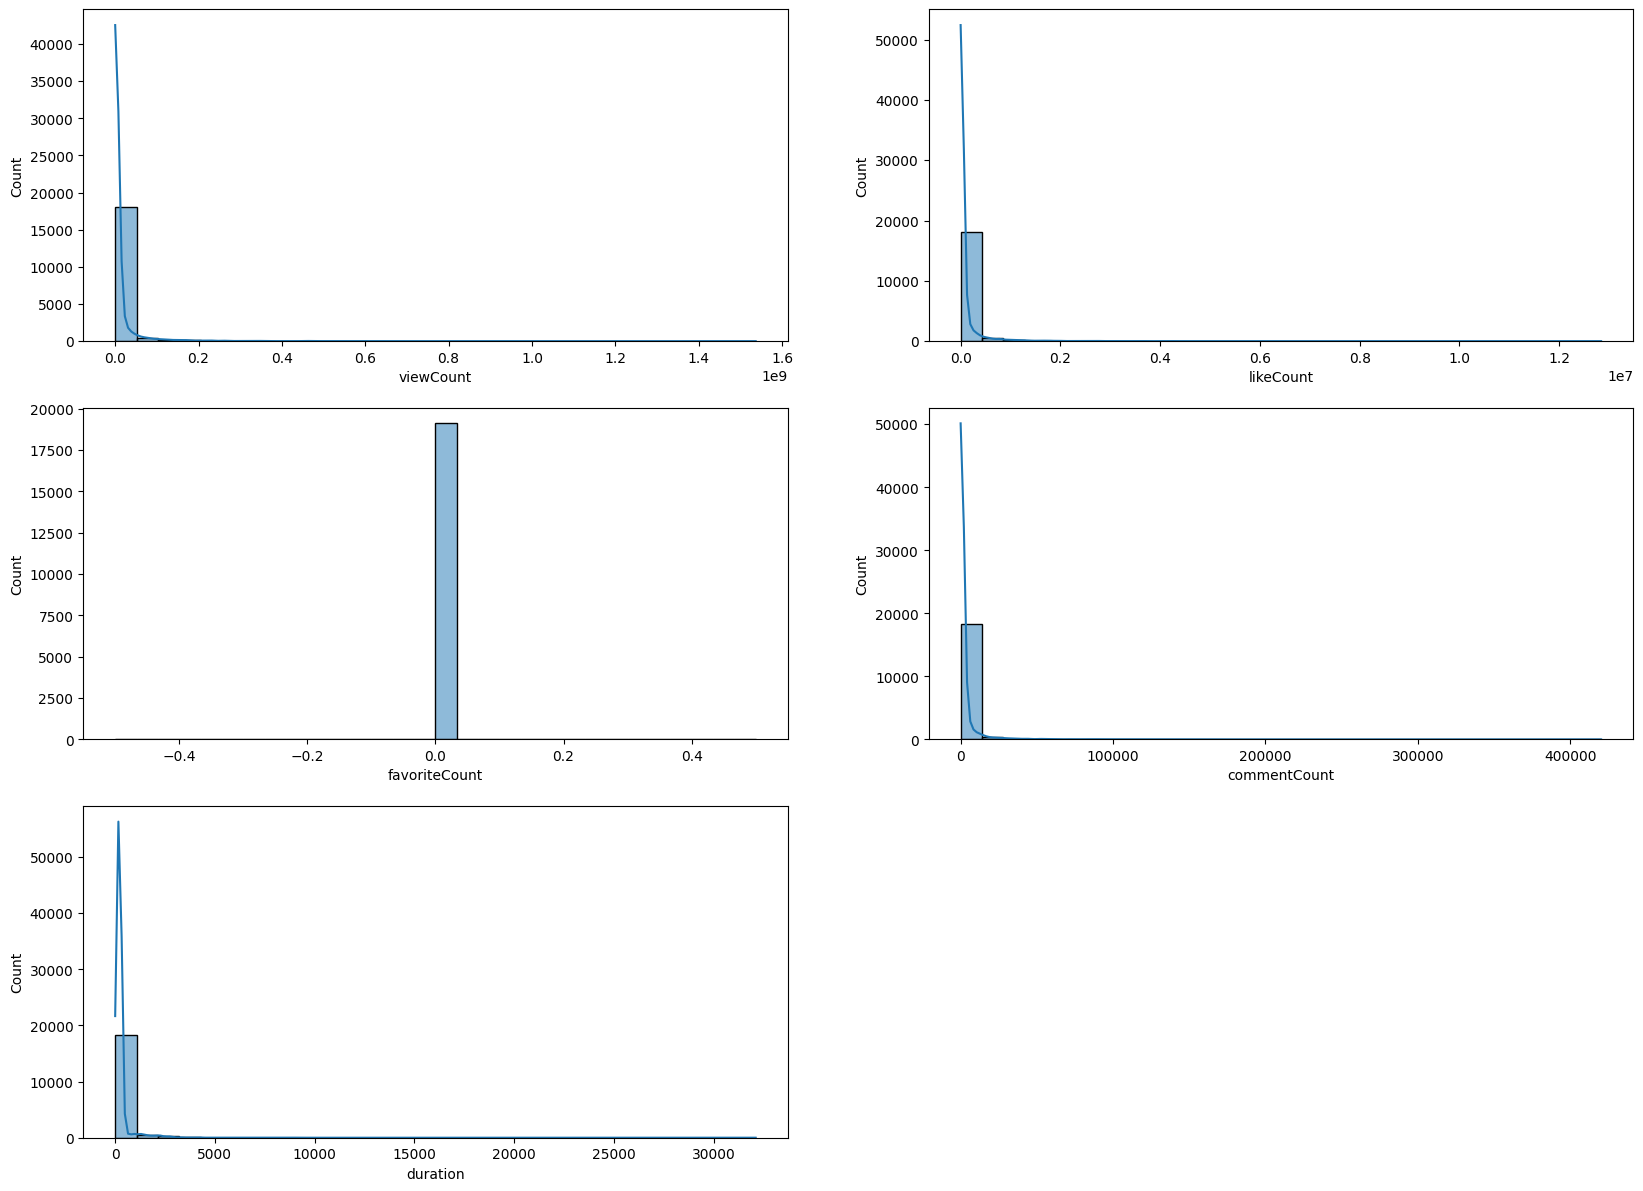

In [30]:
plt.figure(figsize=(20,25))
for i,col in enumerate(['viewCount','likeCount','favoriteCount','commentCount','duration']):
    plt.subplot(5,2,i+1)
    sns.histplot(data=data,x=col,bins=30,kde=True)

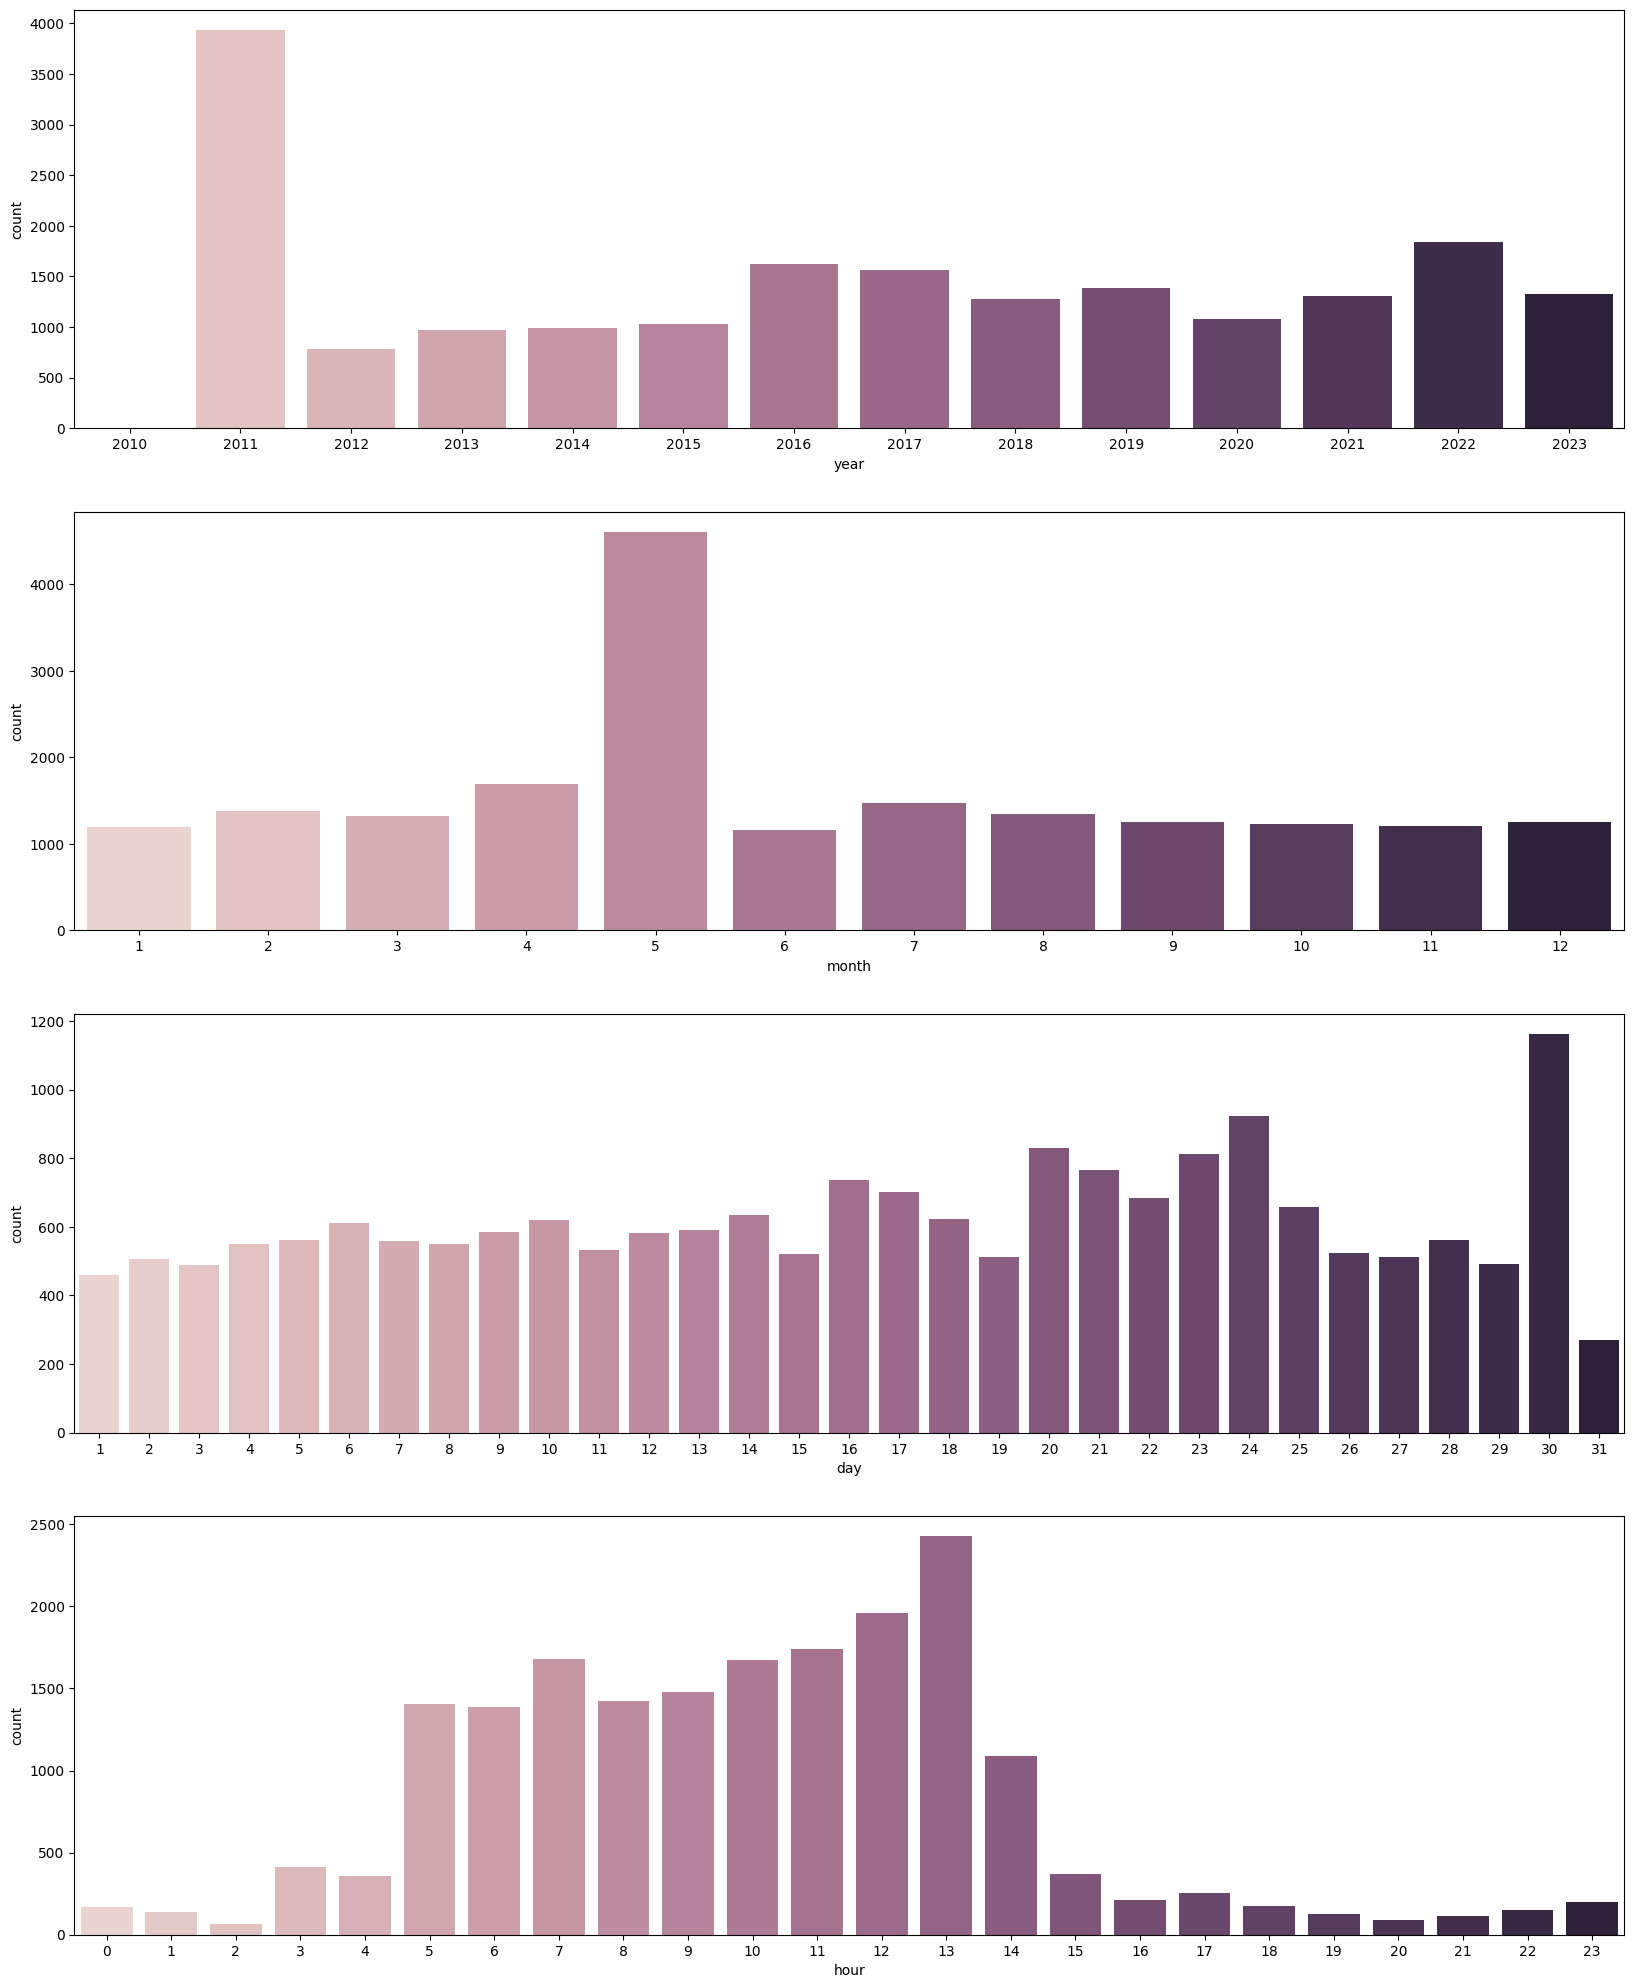

In [31]:
plt.figure(figsize=(20,25))
for i,col in enumerate(['year','month','day','hour']):
    plt.subplot(4,1,i+1)
    sns.countplot(data=data,x=col,hue=col,legend=False)

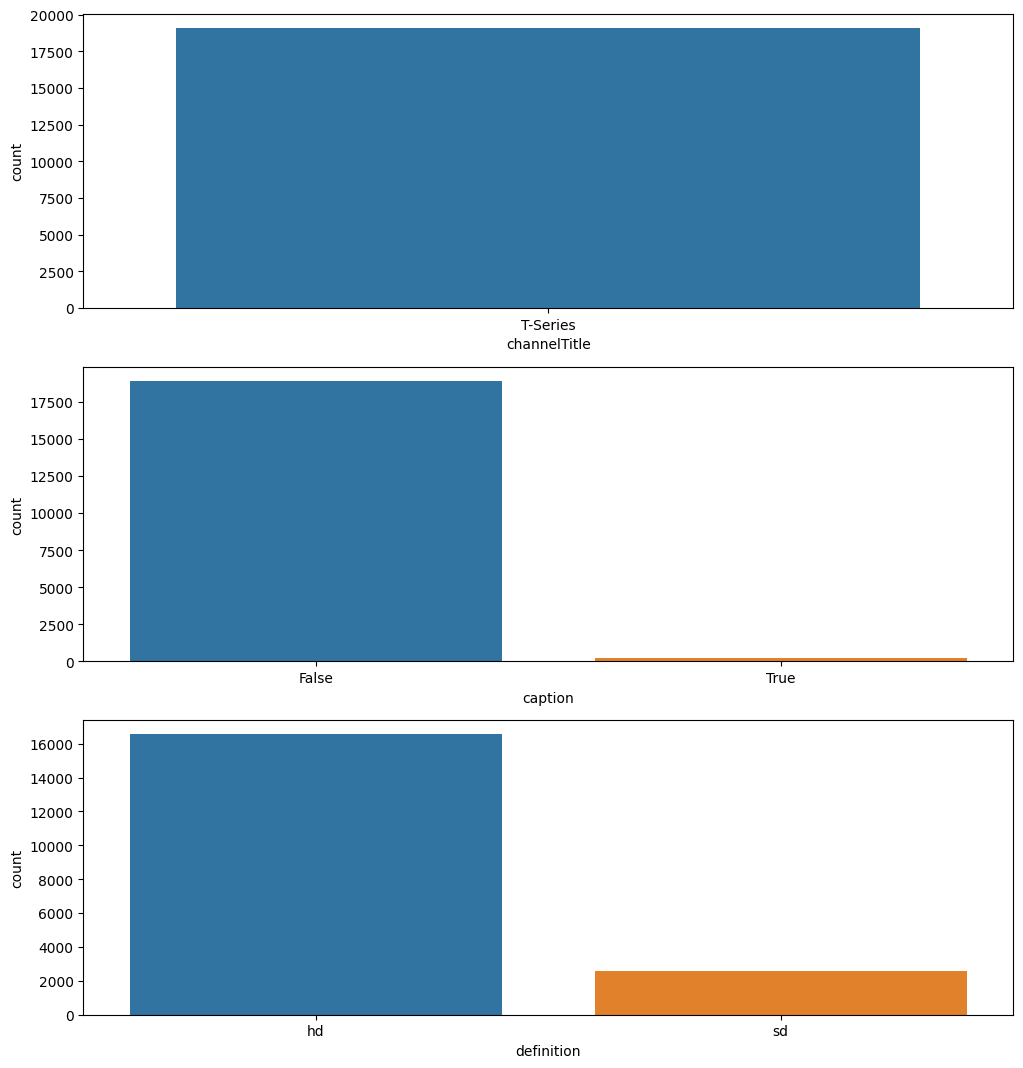

In [32]:
plt.figure(figsize=(12,13))
for i,col in enumerate(['channelTitle','caption','definition']):
    plt.subplot(3,1,i+1)
    sns.countplot(data=data,x=col,hue=col,legend=False)

In [33]:
data.columns

Index(['video_id', 'channelTitle', 'title', 'description', 'tags',
       'publishedAt', 'viewCount', 'likeCount', 'favoriteCount',
       'commentCount', 'duration', 'definition', 'caption', 'date_published',
       'time_published', 'year', 'month', 'day', 'hour'],
      dtype='object')

## Multivaraite analysis

<Axes: xlabel='viewCount', ylabel='likeCount'>

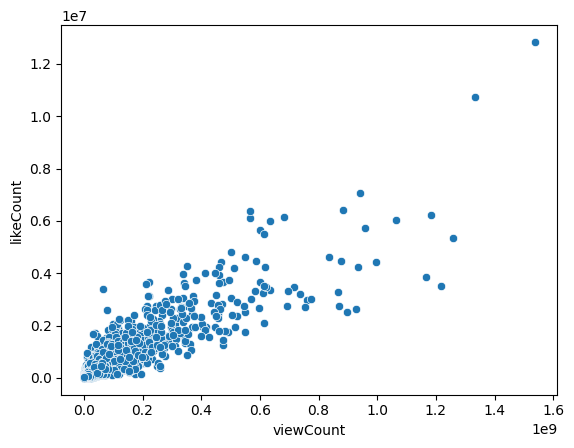

In [34]:
sns.scatterplot(data=data,x="viewCount",y="likeCount")

<Axes: xlabel='viewCount', ylabel='commentCount'>

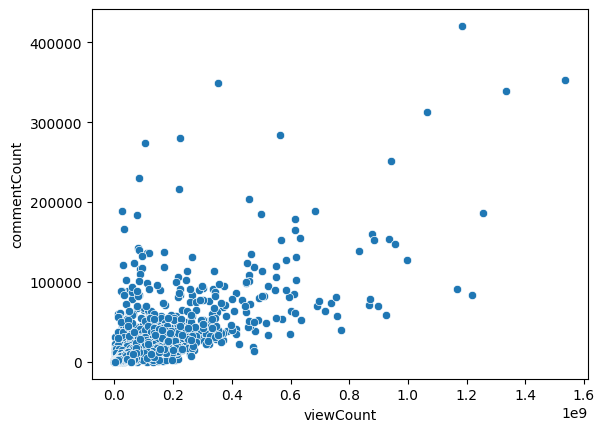

In [35]:
sns.scatterplot(data=data,x="viewCount",y="commentCount")

In [36]:
data.groupby("caption")[["likeCount","viewCount"]].mean()

,likeCount,viewCount
caption,,
False,81769.24,11432073.34
True,698152.44,71872686.47


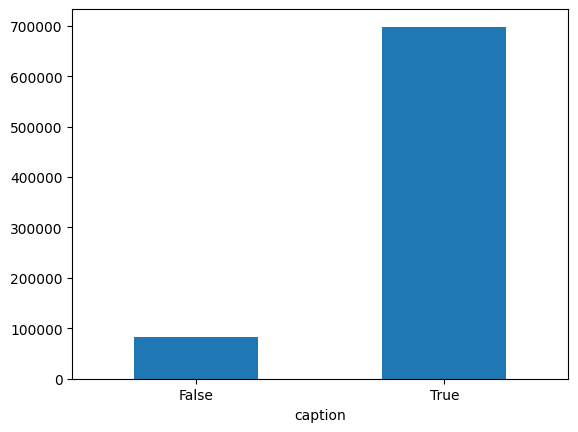

In [37]:
data.groupby("caption")["likeCount"].mean().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

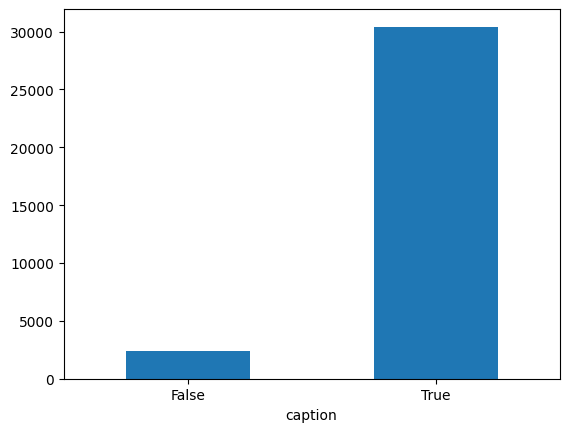

In [38]:
data.groupby("caption")["commentCount"].mean().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

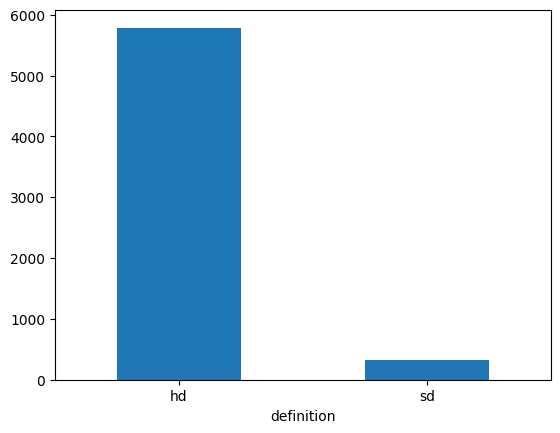

In [39]:
data.groupby("definition")["likeCount"].median().plot(kind="bar")
plt.xticks(rotation=0)
plt.show()

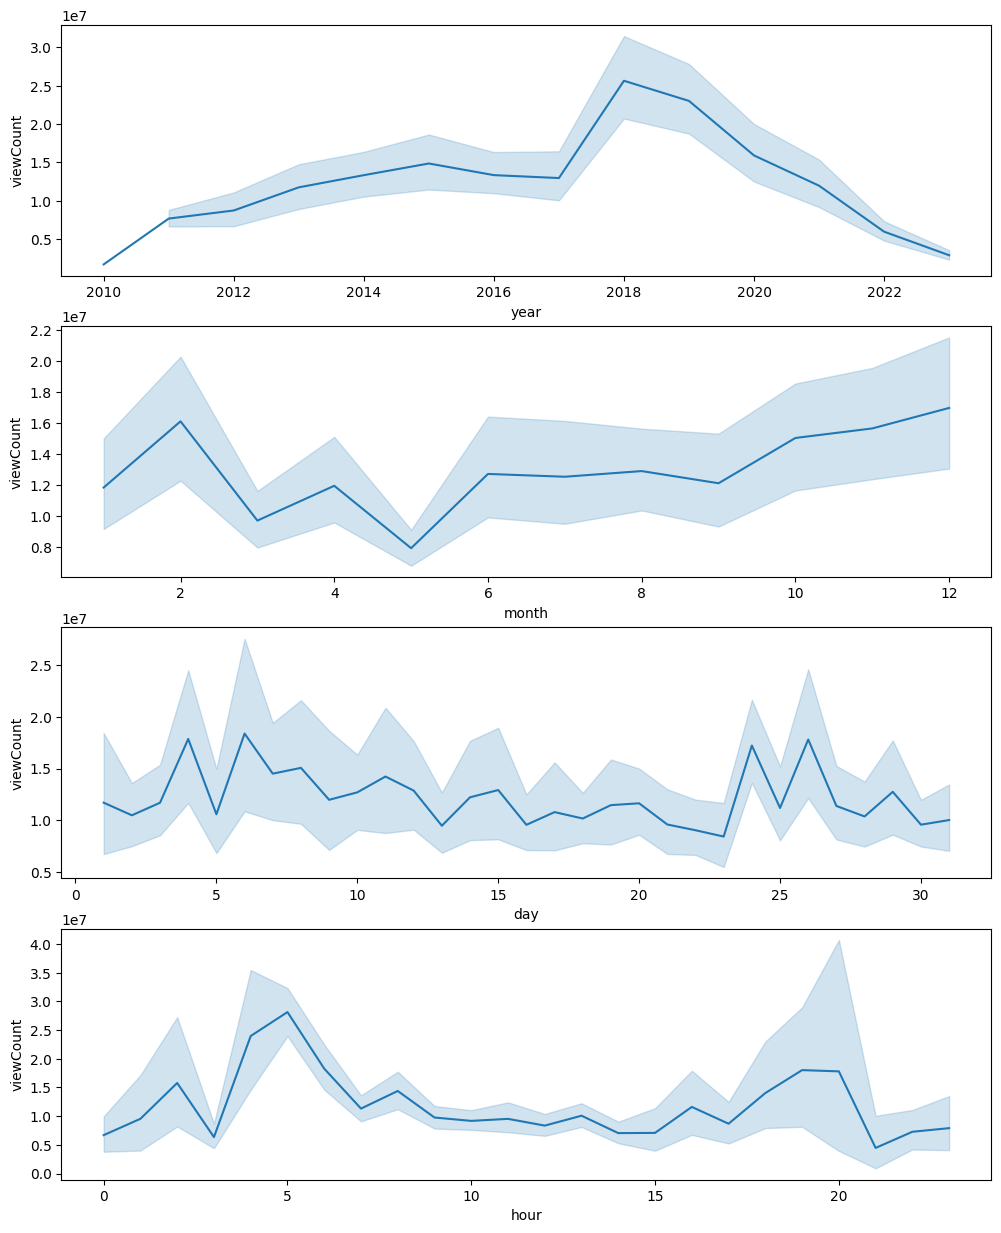

In [40]:
plt.figure(figsize=(12,15))
for i,col in enumerate(['year','month','day','hour']):
    plt.subplot(4,1,i+1)
    sns.lineplot(data=data,x=col,y="viewCount")

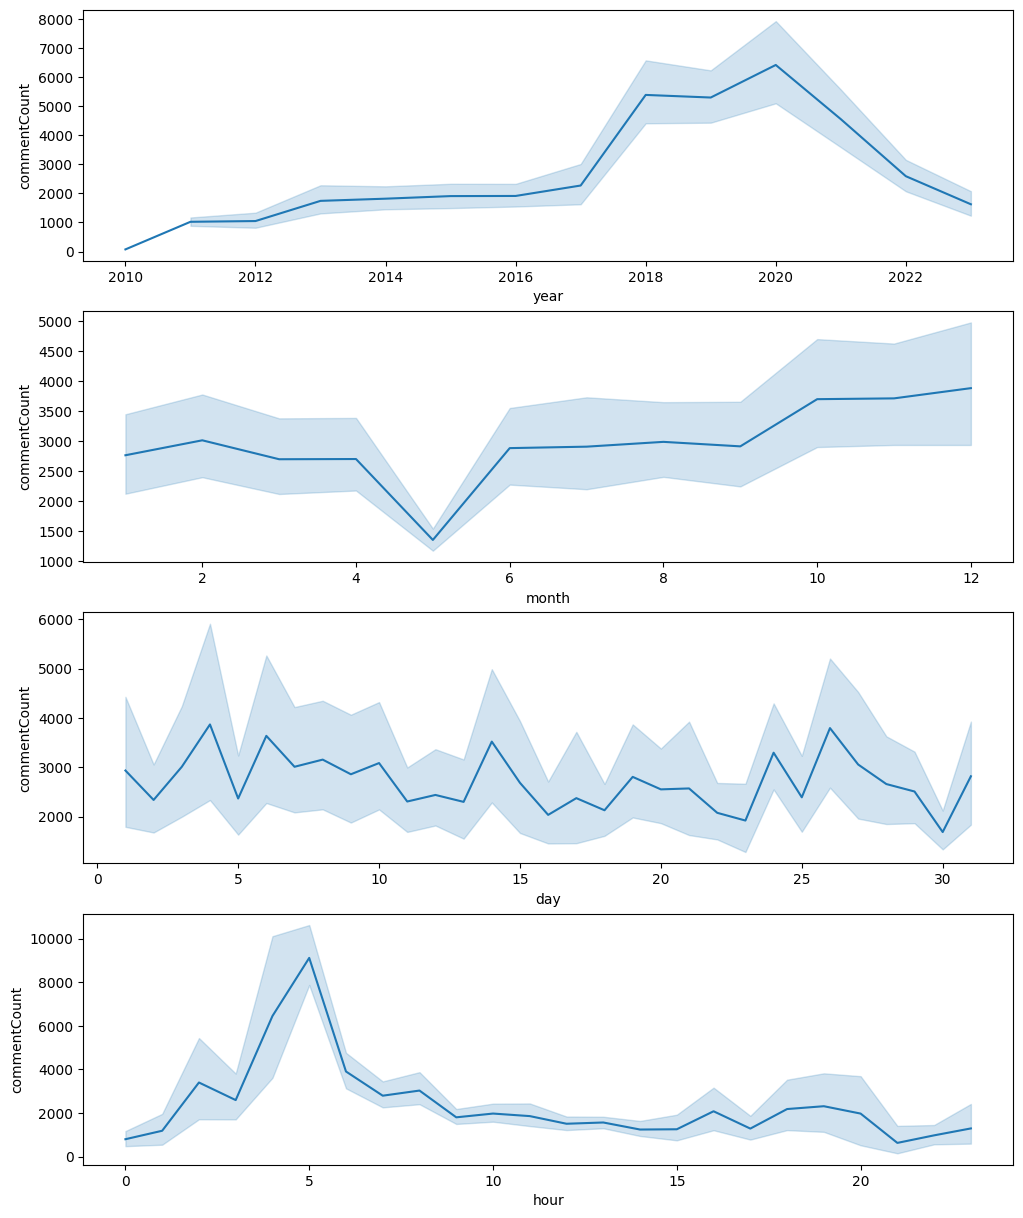

In [41]:
plt.figure(figsize=(12,15))
for i,col in enumerate(['year','month','day','hour']):
    plt.subplot(4,1,i+1)
    sns.lineplot(data=data,x=col,y="commentCount")

In [42]:
counter = Counter()
for row in data.tags:
    row_list = row.split(",")
    counter.update(Counter(combinations(row_list,1)))

In [43]:
counter

Counter({(' tseries',): 10727,
         (' hindi songs',): 8262,
         (' bollywood songs',): 7945,
         (' tseries songs',): 6322,
         (' songs',): 6137,
         (' film songs',): 5423,
         (' new songs',): 4464,
         (' latest songs',): 4106,
         (' movie songs',): 3652,
         (' tseries offical channel',): 3516,
         (' new hindi songs',): 3506,
         (' t-series music',): 3497,
         (' ries',): 3480,
         (' Bollywood Song',): 2809,
         (' t-series',): 2784,
         (' official song',): 2755,
         (' Latest Bollywood Song',): 2580,
         (' tseries movies',): 2336,
         (' hindi songs new',): 2186,
         (' new song',): 2103,
         (' Hindi Bollywood Song',): 2088,
         (' romantic hindi songs',): 2069,
         (' Hindi Songs',): 2068,
         (' hindi movie songs',): 2054,
         (' bollywood',): 2052,
         ('hindi songs',): 1991,
         (' bollywood romantic songs',): 1988,
         (' bollywood dan

In [44]:
tags = pd.DataFrame(counter.keys())
tags["values"] = counter.values()
tags.rename(columns={0:"tag"},inplace=True)

In [45]:
tags["values"]=tags["values"].astype("int32")
tags["tag"]=tags["tag"].astype(str)
tags=tags.sort_values(by="values",ascending=False).reset_index(drop=True)

In [46]:
tags[:5]

,tag,values
0,tseries,10727
1,hindi songs,8262
2,bollywood songs,7945
3,tseries songs,6322
4,songs,6137


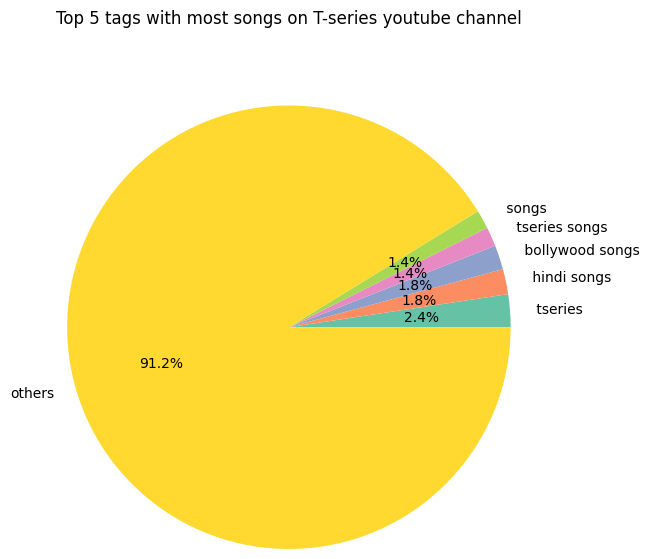

In [47]:
tags5 = tags[:5]

others = sum(list(tags["values"]))-sum(tags5["values"])
tags5=tags5._append({"tag":"others","values":others},ignore_index=True)

plt.pie(tags5["values"] ,labels=tags5["tag"],radius=1.5,autopct="%0.1f%%",colors=sns.color_palette("Set2"))

plt.title("Top 5 tags with most songs on T-series youtube channel",y=1.3)

plt.show()

In [48]:
tags5

,tag,values
0,tseries,10727
1,hindi songs,8262
2,bollywood songs,7945
3,tseries songs,6322
4,songs,6137
5,others,410265


In [54]:
data.to_excel("songs_clean.xlsx")

In [50]:
data.hour.unique()

array([12, 10,  9,  7,  5, 13,  8, 14, 11,  3,  6, 15,  4, 16, 17, 18,  2,
        0,  1, 19, 22, 21, 20, 23])

In [51]:
#tags5.to_excel("tags_5.xlsx")